In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

## Excercise 1 -  Divergence problem

##### Variant A

In [4]:
model = CmdStanModel(stan_file='stan31.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
print(result.diagnose())

Processing csv files: C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205206_1.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205206_2.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205206_3.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205206_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
256 of 4000 (6.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [7]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

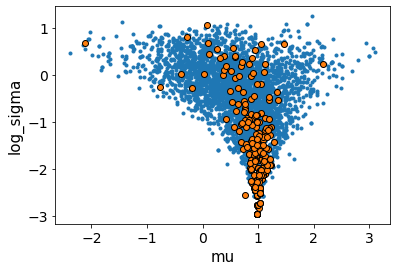

In [8]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [9]:
model = CmdStanModel(stan_file='stan31.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
print(result.diagnose())

Processing csv files: C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205220_1.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205220_2.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205220_3.csv, C:\Users\Emperor\AppData\Local\Temp\tmpp9h0rmzy\stan31-20220316205220_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [12]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

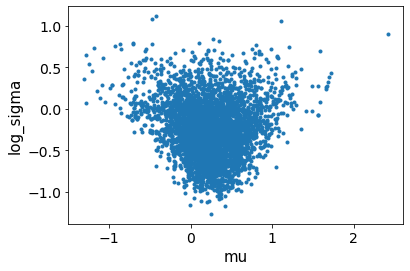

In [13]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [ ]:
#Data read fromm coin.csv

with open('coin.csv') as coin_csv_file:
    coin_data = csv.reader(coin_csv_file)
    y = []
    N = []
    coin_data.__next__()
    for row in coin_data:
        N.append(int(row[0]))
        y.append(int(row[1]))

    N = N[-1] - N[0] + 1
    print(N,y)
#y = 
#N = 


In [ ]:
model = CmdStanModel(stan_file='stanfiles/stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

In [ ]:
result.summary()

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

In [ ]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [18]:
#Data read from normal.csv
#y = 
#N =
with open('normal.csv') as normal_csv_file:
    normal_data = csv.reader(normal_csv_file)
    normal_data.__next__()
    y = []
    for row in normal_data:
        y.append(float(row[1]))

    N = len(y)
#normal=pd.read_csv('normal.csv')
#y = normal['value']
#N =len(normal['value'])


#### Posterior predictive

In [22]:
model = CmdStanModel(stan_file='stan33.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [23]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [24]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,480.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,760.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,840.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,1163.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,1138.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,1056.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,1072.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,1072.0,1.0


In [25]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


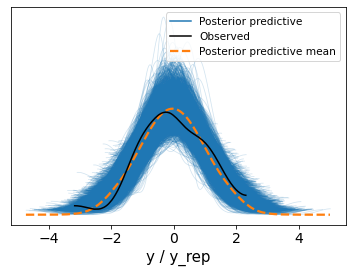

In [26]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [27]:
model = CmdStanModel(stan_file='stan34.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [28]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [29]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.00,0.0,0.0,0.0,NaN,NaN,NaN
mu,0.0230,0.019,0.61,-1.0,0.0,1.2,1000.0,2400.0,1.0
sigma,0.4900,0.024,0.74,0.0,0.0,1.9,990.0,2300.0,1.0
y_prior[1],-0.0160,0.035,1.10,-2.0,0.0,1.8,879.0,2025.0,1.0
y_prior[2],0.0690,0.034,1.10,-1.6,0.0,2.1,999.0,2302.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],0.0055,0.032,1.00,-1.8,0.0,1.8,1057.0,2435.0,1.0
y_prior[97],0.0330,0.034,1.00,-1.8,0.0,1.8,900.0,2075.0,1.0
y_prior[98],0.0380,0.034,1.10,-1.7,0.0,1.8,1002.0,2309.0,1.0


In [30]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\density_utils.py:481: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: setting an array element with a sequence.

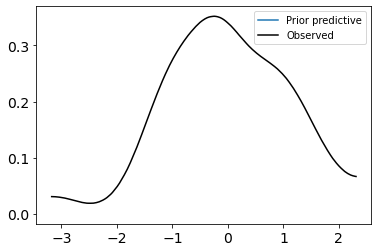

In [31]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

In [ ]:
plt.hist(result.stan_variable(f"y_prior"),bins = 200)